In [1]:
# Set Up Imports
from numpy.lib.type_check import real
from util import *
from physics_pendulum import *
from make_plot import *
from network import RNN

# random.seed(231)
random.seed(420)

learning_rate = 0.001
time_steps = 40
window = 4
epochs = 1000

In [2]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[1] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i*100:i*100+100] for i in range(6)]
training_set = [[x for x in group] for group in training_set]
print(len(training_set[0]))
# print(training_set)

100


In [3]:
# Initialize Network with Nguyen_Widrow weighting
x_network = RNN(1, 100, 1)
x_network.nguyen_widrow()
# print(x_network.n)
# print(x_network.v[0][1])
# print(training_set[0])
# Train Network on First Training Set
error = x_network.train(training_set[0][:time_steps], time_steps,learning_rate=learning_rate, epochs=1000)
# print(error)

# print(x_network.w)
# print(x_network.v)

Epoch 0 	MSE 1.2420111720931453
Epoch 1 	MSE 1.2285171149889804
Epoch 2 	MSE 1.2153001707055016
Epoch 3 	MSE 1.2023594011757632
Epoch 4 	MSE 1.1896933986297586
Epoch 5 	MSE 1.1773003233752872
Epoch 6 	MSE 1.165177940843172
Epoch 7 	MSE 1.1533236576568664
Epoch 8 	MSE 1.1417345565263073
Epoch 9 	MSE 1.1304074298032822
Epoch 10 	MSE 1.1193388115703788
Epoch 11 	MSE 1.108525008167399
Epoch 12 	MSE 1.097962127087923
Epoch 13 	MSE 1.0876461042043777
Epoch 14 	MSE 1.0775727293025819
Epoch 15 	MSE 1.0677376699263925
Epoch 16 	MSE 1.0581364935498718
Epoch 17 	MSE 1.0487646881085482
Epoch 18 	MSE 1.0396176809330497
Epoch 19 	MSE 1.0306908561378023
Epoch 20 	MSE 1.0219795705249113
Epoch 21 	MSE 1.0134791680689295
Epoch 22 	MSE 1.0051849930522132
Epoch 23 	MSE 0.9970924019231516
Epoch 24 	MSE 0.9891967739509582
Epoch 25 	MSE 0.9814935207510658
Epoch 26 	MSE 0.9739780947546688
Epoch 27 	MSE 0.9666459966947633
Epoch 28 	MSE 0.9594927821792212
Epoch 29 	MSE 0.9525140674192059
Epoch 30 	MSE 0.9457055

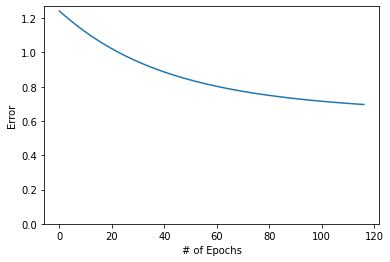

In [4]:
plt.figure(0)
plt.plot(error)
plt.ylabel('Error')
plt.xlabel('# of Epochs')
plt.ylim(0)
plt.show()

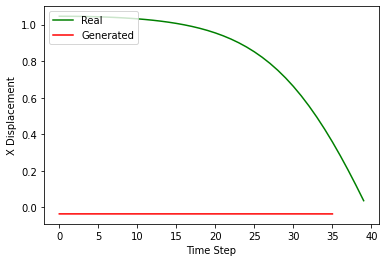

In [5]:
x_generated = []
x_predicted = []
x = training_set[0][0]
for time in range(window,40):
    _, y = x_network.feed_forward(training_set[0][time-window:time])
    # _, z = x_network.feed_forward(x)
    # x = z
    # x_predicted.append(z)
    x_generated.append(y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[0][:40], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
# plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()

In [6]:
print(np.array(x_network.w))
print(np.array(x_network.v))

[[ 0.1889036 ]
 [-0.55276608]
 [ 0.26928247]
 [-0.38936897]
 [ 0.07970159]
 [-0.34896929]
 [-0.20977521]
 [-0.17668568]
 [-0.19990596]
 [-0.43125402]
 [ 0.0680597 ]
 [-0.45610751]
 [-0.41492548]
 [ 0.27711474]
 [ 0.07568992]
 [-0.38414114]
 [-0.40738536]
 [-0.24929577]
 [ 0.04717356]
 [ 0.1883915 ]
 [ 0.31526447]
 [-0.12342045]
 [-0.19314359]
 [-0.17191603]
 [-0.50690509]
 [ 0.36239078]
 [ 0.13032734]
 [ 0.24270625]
 [-0.44620456]
 [ 0.3049454 ]
 [ 0.31498807]
 [-0.00786832]
 [-0.29320355]
 [-0.38880866]
 [-0.50259812]
 [-0.28299947]
 [ 0.07299144]
 [-0.14057911]
 [-0.09294307]
 [-0.07438234]
 [ 0.37297797]
 [ 0.21673728]
 [-0.47437649]
 [-0.16849493]
 [-0.22622634]
 [-0.2964659 ]
 [ 0.28907939]
 [ 0.12503759]
 [ 0.22892707]
 [-0.13822561]
 [-0.00861788]
 [ 0.28798594]
 [-0.21342587]
 [ 0.26881183]
 [ 0.16210988]
 [-0.45172695]
 [ 0.0365754 ]
 [-0.13401675]
 [ 0.40427877]
 [-0.09156925]
 [-0.21029726]
 [ 0.38809572]
 [ 0.45203432]
 [ 0.45224608]
 [ 0.31871283]
 [-0.43261199]
 [ 0.34699